In [1]:
using Paths, Plots
using LinearAlgebra

STEINER_POINTS = 2

function draw(nodeDict)
    nodes = [item.second for item in nodeDict]
    edges = []
    s = scatter(map(x -> x.position, nodes), legend=nothing)
    for node in nodes
    # node = nodeDict[(3.5, 3.5)]
        for neighbor in node.neighbors
            plot!([node.position[1], neighbor.node.position[1]], [node.position[2], neighbor.node.position[2]], arrow=true)
        end
    end
    display(s)
end

function scatterNodes(nodeDict)
    nodes = [item.second for item in nodeDict]
    positions = map(x -> x.position, nodes)
    s = scatter(positions, legend=nothing)
    return s
end


function drawPath(source, path, s)
    pos = map(x -> x.position, path)
    pos = vcat([source], pos)
    for i in 1:length(pos)-1
        plot!([pos[i][1], pos[i+1][1]], [pos[i][2], pos[i+1][2]])
    end
    display(s)
end

Precompiling Paths
  ✓ Paths
  1 dependency successfully precompiled in 2 seconds. 168 already precompiled.


drawPath (generic function with 1 method)

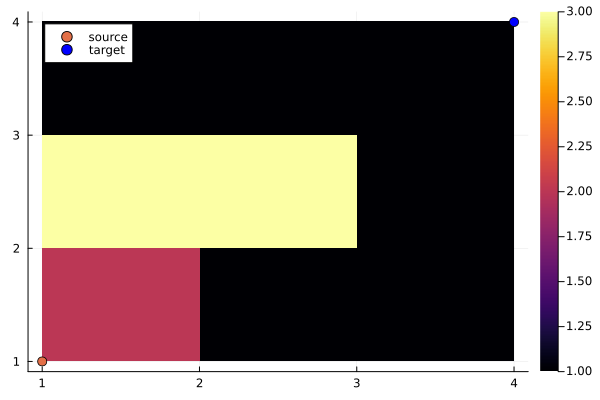

In [2]:
costs = [2. 3. 1.; 1. 3. 1.; 1. 1. 1.]
source = (1.0, 1.0)
target = (4.0, 4.0)
h = heatmap(1.5:3.5, 1.5:3.5, transpose(costs))
scatter!(source, label="source", ms=5)
scatter!(target, label="target", color="blue", ms=5)

In [3]:
nodesByPosition = Dict{Paths.Position, Node}(source => Node(source), target => Node(target))
visitedFaces = Set{Paths.Face}()
sourceNode = nodesByPosition[source]

Node((1.0, 1.0), Paths._Edge[])

In [4]:
Paths.populateNeighbors!(sourceNode, nodesByPosition, visitedFaces, costs, STEINER_POINTS)

LoadError: MethodError: no method matching exploreFace!(::Dict{Tuple{Float64, Float64}, Node}, ::Tuple{Int64, Int64}, ::Matrix{Float64})

[0mClosest candidates are:
[0m  exploreFace!(::Any, ::Any, ::Any, [91m::Any[39m)
[0m[90m   @[39m [35mPaths[39m [90m~/Documents/projects/emergent_transportation/julia/Paths/src/[39m[90m[4msearch.jl:185[24m[39m


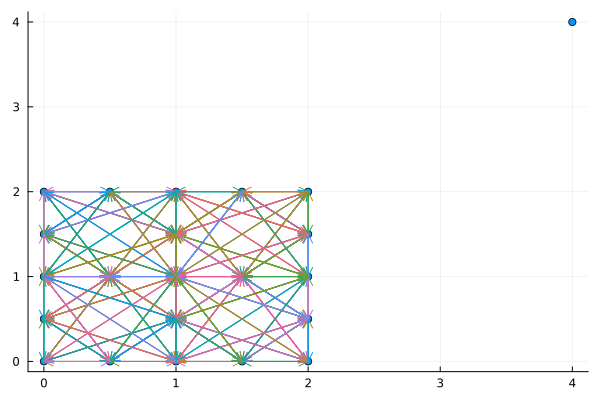

In [5]:
draw(nodesByPosition)

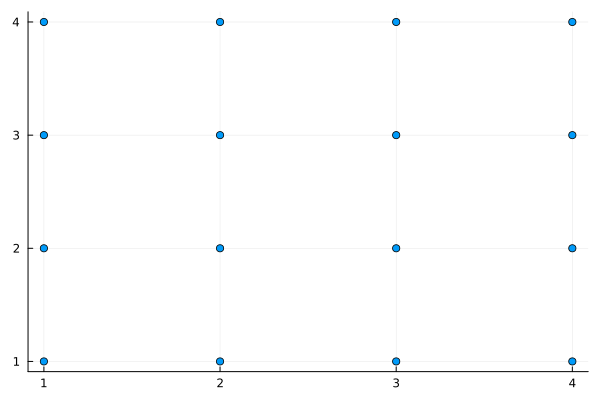

In [24]:
nodeDict, nodesByFace = Paths.constructOriginalGraph(costs3)
neighbors = (n)->[(e.node, e.cost) for e in n.neighbors]
h = n->norm(n.position .- nodeDict[target].position)
sourceNode = nodeDict[source]
scatterNodes(nodeDict)

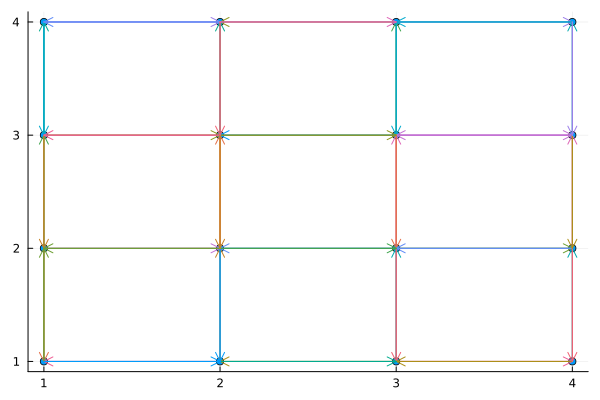

In [4]:
draw(nodeDict)

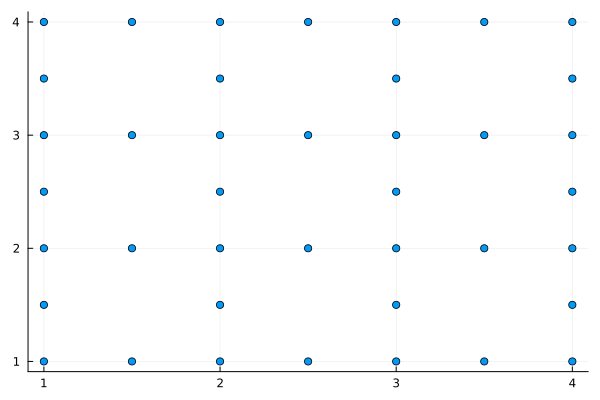

In [5]:
Paths.divideOriginalEdges!(nodeDict, STEINER_POINTS)
scatterNodes(nodeDict)

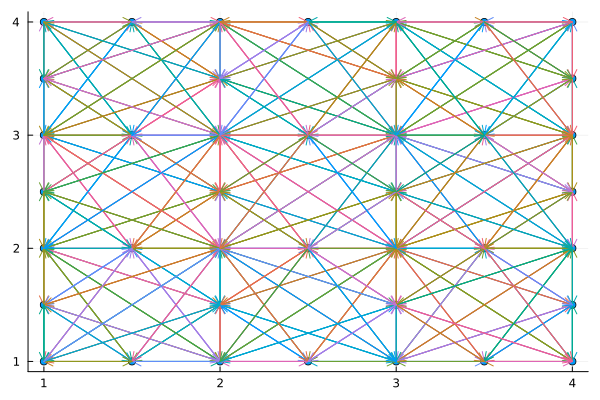

In [6]:
Paths.connectAcrossFaces!(nodeDict, costs3)
draw(nodeDict)

#47 (generic function with 1 method)

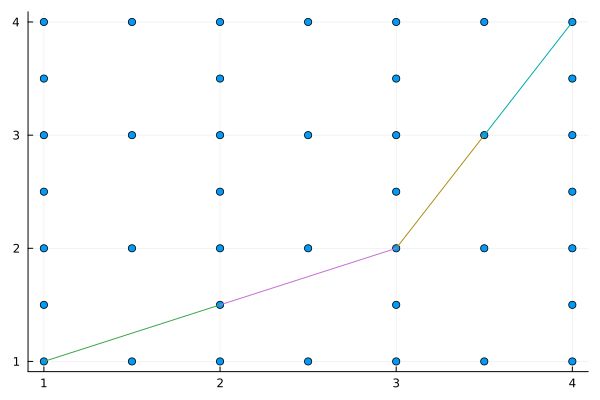

In [23]:
path, newPathCost = Paths.astar(sourceNode, nodeDict[target], neighbors, h)
s = scatterNodes(nodeDict)
drawPath(source, path, s)

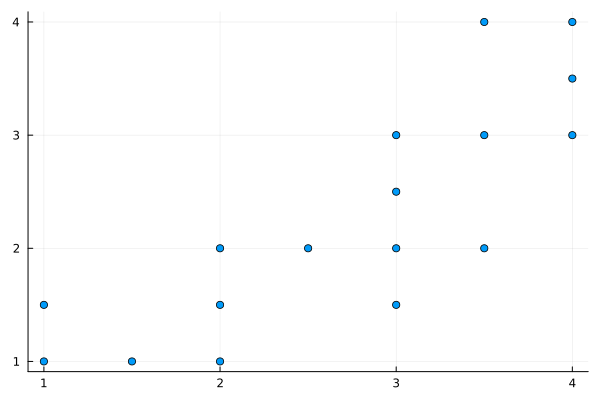

In [25]:
nodeDict = Paths.resetNodes(sourceNode, path)
scatterNodes(nodeDict)

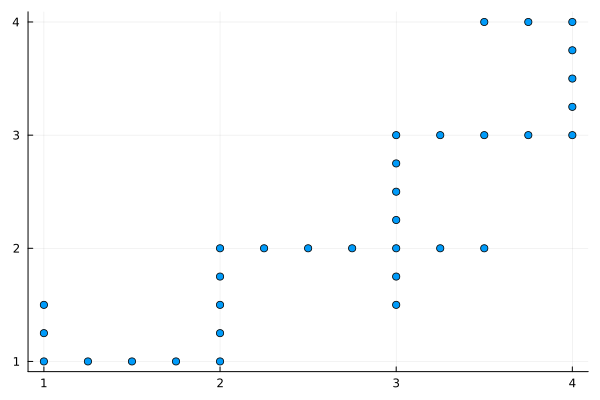

In [26]:
Paths.divideOriginalEdges!(nodeDict, STEINER_POINTS)
display(scatterNodes(nodeDict))

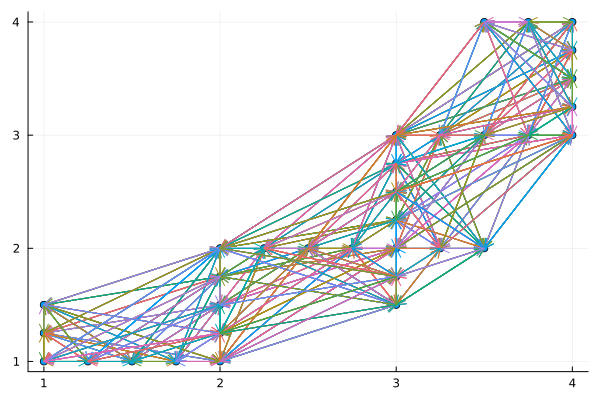

In [31]:
Paths.connectAcrossFaces!(nodeDict, costs3)
draw(nodeDict)

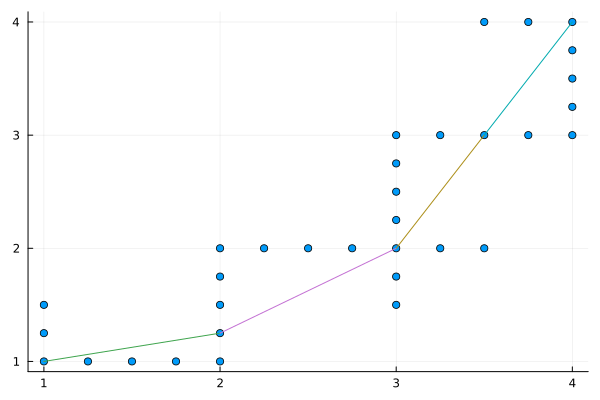

In [35]:
path, newPathCost = Paths.astar(nodeDict[source], nodeDict[target], neighbors, h)
drawPath(source, path, scatterNodes(nodeDict))

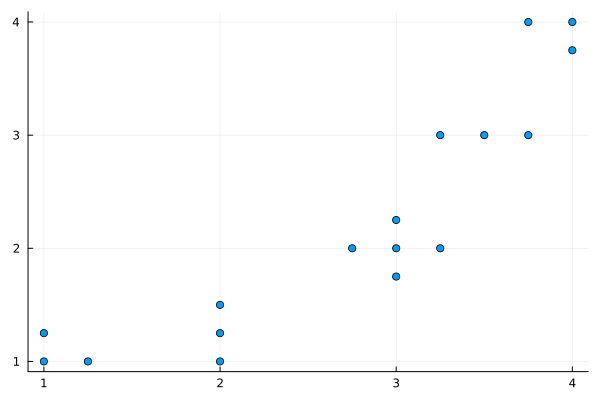

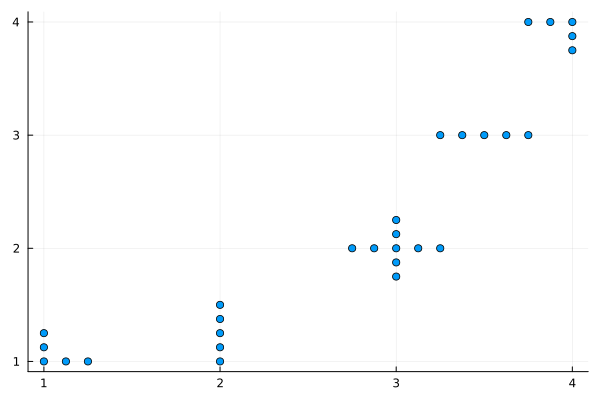

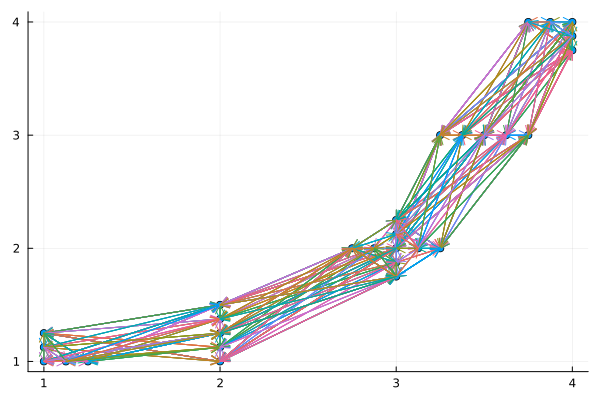

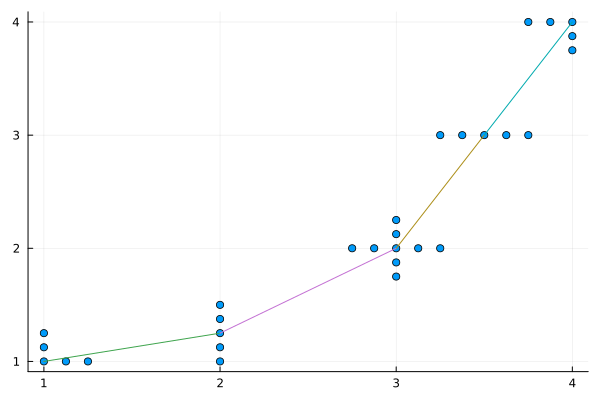

In [36]:
nodeDict = Paths.resetNodes(sourceNode, path)
display(scatterNodes(nodeDict))
Paths.divideOriginalEdges!(nodeDict, STEINER_POINTS)
display(scatterNodes(nodeDict))
Paths.connectAcrossFaces!(nodeDict, costs3)
draw(nodeDict)
path, newPathCost = Paths.astar(nodeDict[source], nodeDict[target], neighbors, h)
drawPath(source, path, scatterNodes(nodeDict))

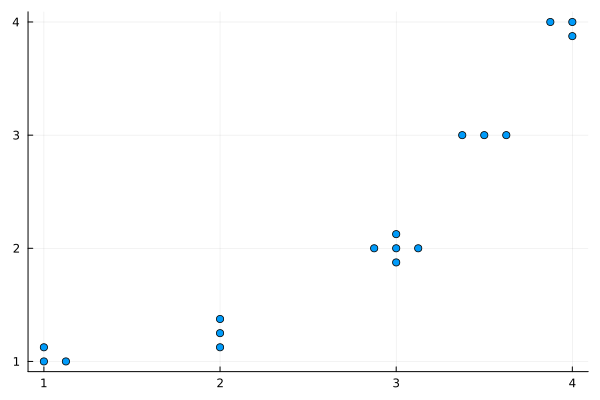

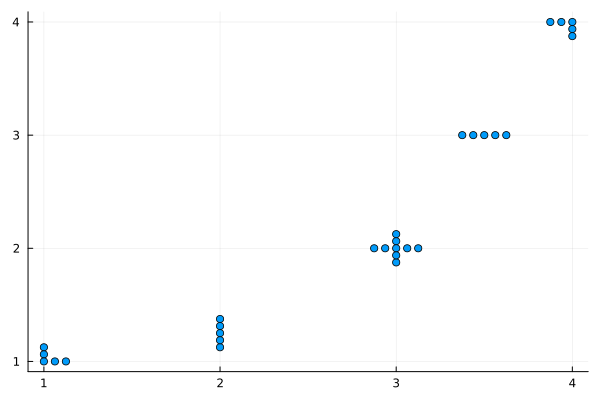

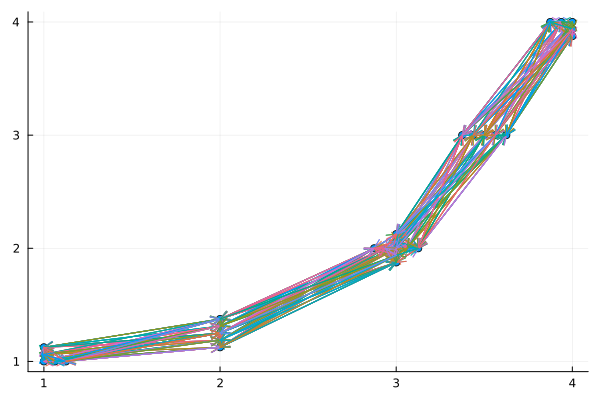

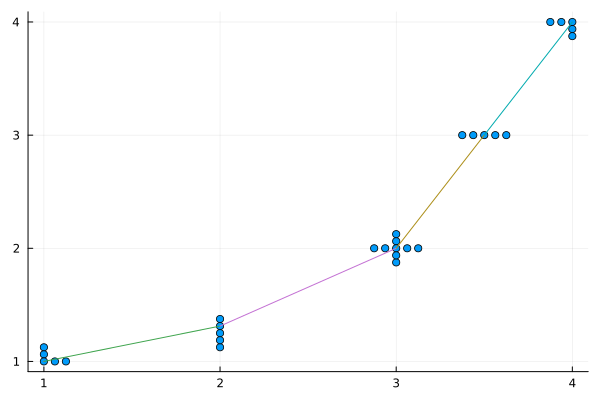

In [37]:
nodeDict = Paths.resetNodes(sourceNode, path)
display(scatterNodes(nodeDict))
Paths.divideOriginalEdges!(nodeDict, STEINER_POINTS)
display(scatterNodes(nodeDict))
Paths.connectAcrossFaces!(nodeDict, costs3)
draw(nodeDict)
path, newPathCost = Paths.astar(nodeDict[source], nodeDict[target], neighbors, h)
drawPath(source, path, scatterNodes(nodeDict))

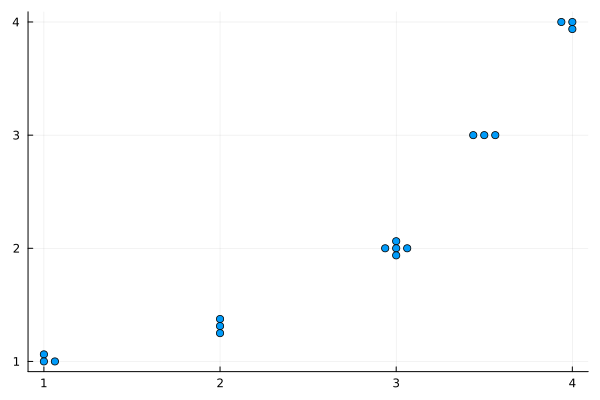

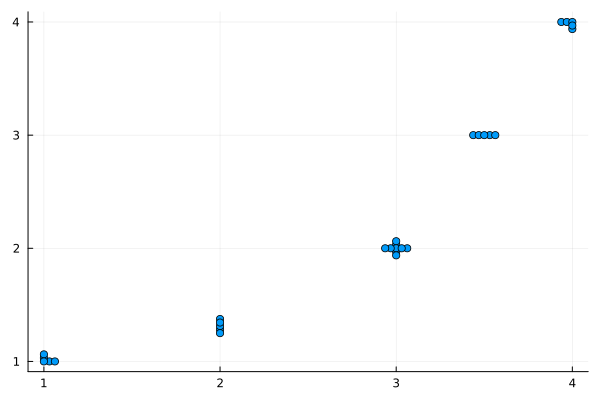

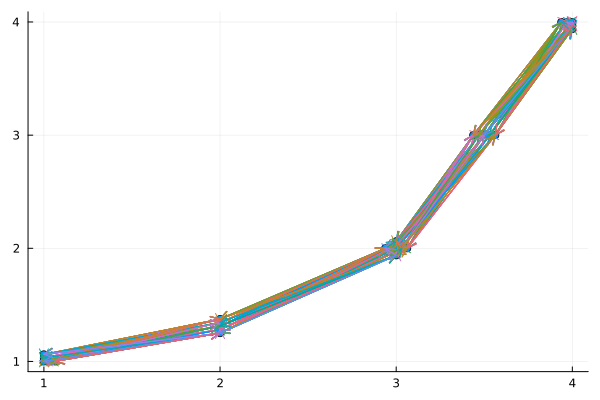

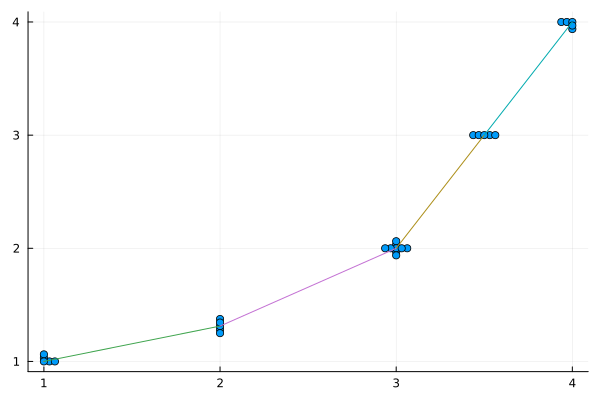

In [38]:
nodeDict = Paths.resetNodes(sourceNode, path)
display(scatterNodes(nodeDict))
Paths.divideOriginalEdges!(nodeDict, STEINER_POINTS)
display(scatterNodes(nodeDict))
Paths.connectAcrossFaces!(nodeDict, costs3)
draw(nodeDict)
path, newPathCost = Paths.astar(nodeDict[source], nodeDict[target], neighbors, h)
drawPath(source, path, scatterNodes(nodeDict))